In [1]:
from k1lib.imports import *

In [2]:
class Network(nn.Module):
    def __init__(self, hiddenDim=10, hiddenLayers=2, relu=True):
        super().__init__()
        activation = lambda: nn.LeakyReLU() if relu else nn.Sigmoid()
        layers = []
        layers += [nn.Linear(1, hiddenDim), activation()]
        for i in range(hiddenLayers):
            layers += [nn.Linear(hiddenDim, hiddenDim), activation()]
        layers += [nn.Linear(hiddenDim, 1)]
        self.bulk = nn.Sequential(*layers)
    def forward(self, x):
        return self.bulk(x)

In [11]:
def newL(bs=64, optF=None, hiddenDim=10):
    if optF == None: optF = lambda x: optim.SGD(x, lr=2e-4, momentum=0.9)
    if optF == "Adam": optF = lambda p: optim.Adam(p, lr=1e-2)
    l = k1lib.Learner()
    l.model = Network(hiddenDim=hiddenDim)
    l.data = k1lib.data.Data.fromDataset(k1lib.data.FunctionDataset.exp, bs)
    l.opt = optF(l.model.parameters())
    l.lossF = lambda x, y: ((x.squeeze() - y)**2).mean()
    #l.lossF = lambda x, y: (x**2).mean()
    l.cbs = k1lib.Callbacks().withProgressBar().withLoss()
    l.cbs.withModifyBatch(lambda x, y: (x[:, None], y))
    l.cbs.withDType(torch.float32);
    def evaluate(self):
        xbs, ybs, ys = self.record(1, 3)
        xbs = torch.vstack(xbs).squeeze()
        ybs = torch.vstack([yb[:, None] for yb in ybs]).squeeze()
        ys = torch.vstack(ys).squeeze()
        #plt.plot(xbs, ybs, ".")
        plt.plot(xbs, ys.detach(), ".")
    l.evaluate = partial(evaluate, l)
    l.cbs.withCancelOnLowLoss(1, epochMode=True)
    return l

In [12]:
l = newL(optF="Adam")

In [13]:
l.run(10);

Progress:  48%, epoch:  4/10, batch:   25/31, elapsed:   1.29s  Run cancelled: Low loss 1 achieved!.


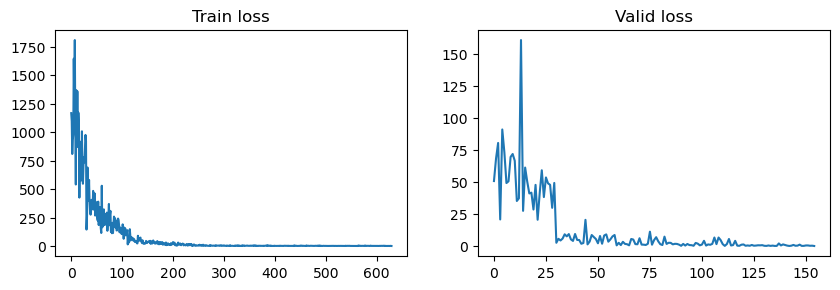

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot

Reminder: the actual slice you put in is for the training plot. The valid loss's plot will update automatically to be in the same time frame

In [14]:
l.Loss.plot()

In [18]:
hs = [a for a in range(10, 100) for i in range(10)]
ps = []
for h in hs:
    l = newL(optF="Adam", hiddenDim=h)
    l.run(30)
    ps.append(l.progress)
with open("data.pth", "wb") as f: pickle.dump(k1lib.Object.fromDict({"hs": hs, "ps": ps}), f)

Progress:  26%, epoch:  7/30, batch:   24/31, elapsed:   2.08s  Run cancelled: Low loss 1 achieved!.
Progress:  16%, epoch:  4/30, batch:   25/31, elapsed:    1.3s  Run cancelled: Low loss 1 achieved!.
Progress:  16%, epoch:  4/30, batch:   25/31, elapsed:   1.32s  Run cancelled: Low loss 1 achieved!.
Progress:  16%, epoch:  4/30, batch:   25/31, elapsed:   1.31s  Run cancelled: Low loss 1 achieved!.
Progress:  16%, epoch:  4/30, batch:   25/31, elapsed:   1.29s  Run cancelled: Low loss 1 achieved!.
Progress:  12%, epoch:  3/30, batch:   22/31, elapsed:   1.02s  Run cancelled: Low loss 1 achieved!.
Progress:  12%, epoch:  3/30, batch:   22/31, elapsed:   1.03s  Run cancelled: Low loss 1 achieved!.
Progress:  57%, epoch: 17/30, batch:   0/126, elapsed:   4.42s  Run cancelled: Low loss 1 achieved!.
Progress:  16%, epoch:  4/30, batch:   25/31, elapsed:    1.3s  Run cancelled: Low loss 1 achieved!.
Progress:  20%, epoch:  5/30, batch:   28/31, elapsed:   1.56s  Run cancelled: Low loss 1 a

TypeError: dump() missing 1 required positional argument: 'file'

## Analysis

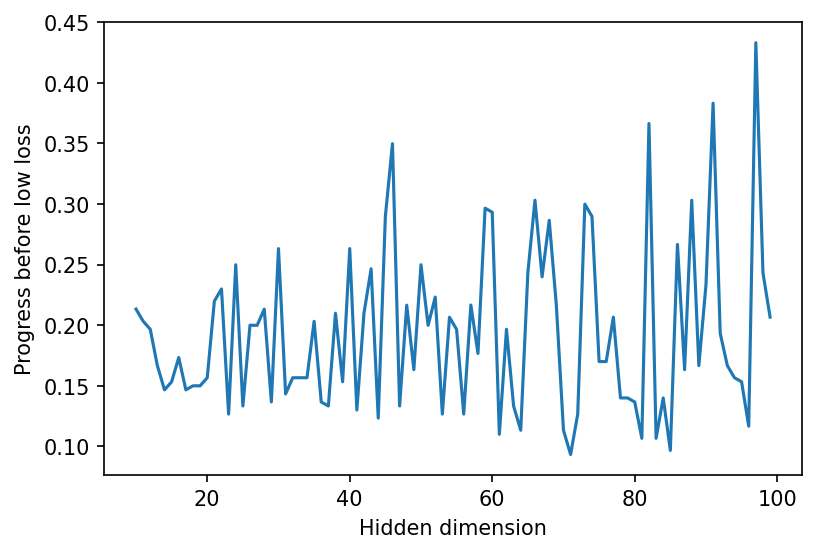

In [26]:
with open("data.pth", "rb") as f: data = pickle.load(f)
smooth = 10; plt.figure(dpi=150); plt.xlabel("Hidden dimension"); plt.ylabel("Progress before low loss")
plt.plot(k1lib.smooth(data.hs, smooth), k1lib.smooth(data.ps, smooth));

Doesn't seem to affect things much. It can learn at extremely high dimensions and be just fine